## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Data Driven Risk Analysis of Aircraft Safety for Business Expansion


_This wlll be a beautiful intro into the projec_

## Overview

Before taking a deep dive into the available data as our company ventures into this new territory, it is important for us to ask a few important questions. Quesions important to our company and questions that will help us understand whether this new endevour aligns with our future and diretion we mean to take our business. 
The questions culd look something like this;
- **Aircraft selection**: Which models have the best safety records? Which types are most prone to incidents?
- **Fleet size planning**: How many planes should the company buy initially? Can incident trends inform scaling?
- **Route selection**: Which routes are safest? Are there accident-prone regions?
- **Operational risks**: What common causes lead to accidents? Can the company mitigate these risks?
- **Regulatory compliance**: What aviation regulations are relevant for operational safety?
- **Weather and environmental impact**: How do weather conditions correlate with incidents?

## Data Understanding

Getting to have a feel of the data that is provided 

In [3]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# opneing the csv dataset into a DataFrame aviation_data
aviation_data = pd.read_csv('data/Aviation_Data.csv', sep=',', header=0, low_memory=False)
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
# Getting a general of what the avation dataset looks like 
print(f"The shape of aviation_data is :\n", aviation_data.shape)
print()
print(f"Some of the important features of the dataset", aviation_data.info())
print()
print(f"Snapshot of what the numeric data looks like \n", aviation_data.describe())

The shape of aviation_data is :
 (90348, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  objec

# Data Cleaning 

##  Identifying Columns with Significant Issues

From the preliminary assessment of the dataset provided by the **NTSB**, we observe that some columns contain significantly more problems than others. This includes **high percentages of missing values** and **inconsistencies in data quality**. 

At this stage, it is crucial to:
1. **Decide which columns are not useful for our analysis**—especially those with missing data exceeding 50%.
2. **Identify columns with highly mixed or inconsistent values**, as cleaning them may not be feasible.
3. **Evaluate which columns are relevant to our business questions** to ensure we focus on meaningful insights.






In [11]:
# Start off by identifying the columns that have a high number of null values 
aviation_data.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [13]:
np.round(aviation_data.isnull().sum() / len(aviation_data) * 100, 2)

Event.Id                   1.61
Investigation.Type         0.00
Accident.Number            1.61
Event.Date                 1.61
Location                   1.67
Country                    1.87
Latitude                  61.94
Longitude                 61.95
Airport.Code              44.51
Airport.Name              41.67
Injury.Severity            2.72
Aircraft.damage            5.15
Aircraft.Category         64.26
Registration.Number        3.14
Make                       1.68
Model                      1.72
Amateur.Built              1.73
Number.of.Engines          8.35
Engine.Type                9.47
FAR.Description           64.56
Schedule                  86.07
Purpose.of.flight          8.47
Air.carrier               81.57
Total.Fatal.Injuries      14.23
Total.Serious.Injuries    15.46
Total.Minor.Injuries      14.82
Total.Uninjured            8.16
Weather.Condition          6.59
Broad.phase.of.flight     31.68
Report.Status              8.68
Publication.Date          18.47
dtype: f

### Percentage of Missing Values Per Column

Below is a breakdown of **null value percentages** > 10% in the dataset:

| Column Name                | Missing Data (%) |
|----------------------------|-----------------|
| **Latitude**               | 61.94% |
| **Longitude**              | 61.95% |
| **Airport.Code**           | 44.51% |
| **Airport.Name**           | 41.67% |
| **Aircraft.Category**      | 64.26% |
| **FAR.Description**        | 64.56% |
| **Schedule**               | 86.07% |
| **Air.carrier**            | 81.57% |
| **Broad.phase.of.flight**  | 31.68% |
| **Publication.Date**       | 18.47% |
| **Total.Fatal.Injuries**   | 14.23% |
| **Total.Serious.Injuries** | 15.46% |
| **Total.Minor.Injuries**   | 14.82% |

####  Columns That May Be **Dropped or Prioritized for Cleaning**

- **Columns with Extremely High Missing Data (>50%)**
  - `Latitude` and `Longitude`: Geographical data is missing for over **60%** of the records.
  - `Aircraft.Category` and `FAR.Description`: Missing in **more than 60%** of cases.
  - `Schedule`: Missing in **86%** of records—likely unreliable for analysis.
  - `Air.carrier`: Missing in **81%** of records—may not be useful.



In [16]:
# Removing the columns with the highest number of missing values
aviation_data.drop(columns=['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier'], axis=1, inplace=True)

- **Columns That May Not Be Critical to Business Questions**
  - `Registration.Number`: Not needed for general aviation safety or route planning.
  - `Airport.Code` and `Airport.Name`- these have significant number of missing values, and in general may not offer much insight
  - `Publication.Date`: Related to report processing rather than accident causes.

In [19]:
# Dropping columns with data that is not essential for the business question
aviation_data.drop(columns=['Airport.Code', 'Airport.Name', 'Publication.Date', 'Registration.Number'], axis=1, inplace=True)
aviation_data.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause


- **FInding event identifing columns that will have use**
- `Event.Id`, `Accident.Number`: These are unique identifiers and **do not contribute to analysis**. However they may be useful be useful further data cleaning or creating useful datasets down the line. Possibly create a dataframe to store them for later use. There is no need to keep both identifier columns, one may be enough. This will be beneficial down the line especially when dealing with duplicated values.
- `Investigation.Type` - not cruicial for the for the analysis aand goes hand in hand with `Accident.Number`. We may drop both especially if `Investiation.Type` is found to contain alot mixed data types, or does not give us clear picture of what the incidents were like. 

In [22]:
# Keep one column as unique dentifier of incidents 
aviation_data.drop(columns=['Accident.Number', 'Investigation.Type'], inplace=True)

In [24]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Make                    88826 non-null  object 
 7   Model                   88797 non-null  object 
 8   Amateur.Built           88787 non-null  object 
 9   Number.of.Engines       82805 non-null  float64
 10  Engine.Type             81793 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

In [26]:
aviation_data.isna().sum()

Event.Id                   1459
Event.Date                 1459
Location                   1511
Country                    1685
Injury.Severity            2459
Aircraft.damage            4653
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
Purpose.of.flight          7651
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
dtype: int64

In [28]:
print(f"Counts based on state of plane at crash site:\n", aviation_data['Aircraft.damage'].value_counts())

Counts based on state of plane at crash site:
 Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64


##  Next Steps

1. **Impute or clean columns with moderate missing data and inconsitencies** if they are critical to the analysis.
2. **Focus on columns that answer key business questions**, such as:
   - **Aircraft safety**: `Make`, `Model`, `Number.of.Engines`, `Engine.Type`, `'Aircraft.damage`
   - **Route risk assessment**: `Location`, `Weather.Condition`
   - **Operational risks**: `Broad.phase.of.flight`, `Purpose.of.flight`
   - **Human safety impact**: `Injury.Severity`, `Total.Fatal.Injuries` 

## Step 1: Fixing data inconstencies
- Standardized text fields by converting them to **uppercase** and **removing extra spaces**.
- Ensured consistency in categorical values like `Country`, `Make`, and `Weather.Condition` to **prevent duplicates due to case differences**.

In [32]:
# creating a listof columns containing text
text_col = ['Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.damage', 'Make', 'Model', 'Amateur.Built', 'Engine.Type',
            'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status']

# Dealing with white spaces and trailing characters
for column in text_col:
    aviation_data[column] = aviation_data[column].astype(str).str.strip().str.upper()

aviation_data.sample(5)

,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
10782,20001214X35540,1985-01-31,"APPLE VALLEY, CA",UNITED STATES,NON-FATAL,SUBSTANTIAL,CESSNA,182C,NO,1.0,RECIPROCATING,PERSONAL,0.0,2.0,0.0,0.0,VMC,APPROACH,PROBABLE CAUSE
72273,20120720X24005,2012-07-18,"WISNER, LA",UNITED STATES,NON-FATAL,SUBSTANTIAL,AIR TRACTOR INC,AT-502B,NO,1.0,TURBO PROP,AERIAL APPLICATION,0.0,0.0,1.0,0.0,VMC,NAN,THE PILOTS INADEQUATE TAKEOFF PLANNING THAT D...
25408,20001212X23167,1990-05-04,"RIVERSIDE, CA",UNITED STATES,NON-FATAL,SUBSTANTIAL,BELL,47G,NO,1.0,RECIPROCATING,INSTRUCTIONAL,0.0,0.0,1.0,0.0,VMC,MANEUVERING,PROBABLE CAUSE
54403,20030410X00470,2003-04-04,"ALLENTOWN, PA",UNITED STATES,NON-FATAL,SUBSTANTIAL,WACO,YOC,NO,1.0,RECIPROCATING,PERSONAL,NaN,NaN,NaN,2.0,IMC,LANDING,PROBABLE CAUSE
36415,20001206X02602,1994-11-21,"BLANCO, TX",UNITED STATES,NON-FATAL,SUBSTANTIAL,CESSNA,172P,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,1.0,VMC,TAKEOFF,PROBABLE CAUSE


In [34]:
aviation_data['Country'].value_counts()

Country
UNITED STATES    82248
NAN               1685
BRAZIL             374
CANADA             359
MEXICO             358
                 ...  
MAURITANIA           1
OBYAN                1
WOLSELEY             1
ALBANIA              1
GUERNSEY             1
Name: count, Length: 216, dtype: int64

##  Step 2: Handling Duplicates
- Identified potential **duplicate records** using `Event.Id`, `Event.Date`, `Make`, and `Model`.
- Remove **exact duplicate records** to maintain dataset integrity.
> Taking into account that there are columns that we anticipate duplicates, we want to focus on unique identifiers, e.g. `Event.Id`, `Event.Date`

In [37]:
# inspect duplicated rows 
print(f"The sum of exact duplicated rows is: ", aviation_data.duplicated().sum())
print()
print('Below a sample of duplicate rows')
aviation_data[aviation_data.duplicated(keep=False)]

The sum of exact duplicated rows is:  1486

Below a sample of duplicate rows


,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
1370,20020917X02935,1982-05-28,"EVANSVILLE, IN",UNITED STATES,NON-FATAL,SUBSTANTIAL,CESSNA,172,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,7.0,VMC,CRUISE,PROBABLE CAUSE
1371,20020917X02935,1982-05-28,"EVANSVILLE, IN",UNITED STATES,NON-FATAL,SUBSTANTIAL,CESSNA,172,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,7.0,VMC,CRUISE,PROBABLE CAUSE
3081,20020917X04638,1982-10-18,GULF OF MEXICO,GULF OF MEXICO,FATAL(3),DESTROYED,BELL,206B,YES,1.0,TURBO SHAFT,UNKNOWN,3.0,0.0,0.0,0.0,VMC,CRUISE,PROBABLE CAUSE
3082,20020917X04638,1982-10-18,GULF OF MEXICO,GULF OF MEXICO,FATAL(3),DESTROYED,BELL,206B,YES,1.0,TURBO SHAFT,UNKNOWN,3.0,0.0,0.0,0.0,VMC,CRUISE,PROBABLE CAUSE
4760,20001214X43016,1983-05-22,"BRIDGEPORT, CA",UNITED STATES,FATAL(1),SUBSTANTIAL,SCHEMPP-HIRTH,STANDARD CIRRUS,NO,NaN,UNKNOWN,UNKNOWN,1.0,0.0,0.0,1.0,VMC,CRUISE,PROBABLE CAUSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90004,NaN,NaN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NaN,NAN,NAN,NaN,NaN,NaN,NaN,NAN,NAN,NAN
90010,NaN,NaN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NaN,NAN,NAN,NaN,NaN,NaN,NaN,NAN,NAN,NAN
90031,NaN,NaN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NaN,NAN,NAN,NaN,NaN,NaN,NaN,NAN,NAN,NAN
90090,NaN,NaN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NaN,NAN,NAN,NaN,NaN,NaN,NaN,NAN,NAN,NAN


> From the sampling above the duplicated rows generally seem to be exact copies or containing NaN values, so the best move is to drop and only keep one of the copied rows.

In [40]:
# Now dropping the duplicated rows
aviation_data = aviation_data.drop_duplicates(subset='Event.Id', keep='first')
aviation_data

,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",UNITED STATES,FATAL(2),DESTROYED,STINSON,108-3,NO,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,UNK,CRUISE,PROBABLE CAUSE
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",UNITED STATES,FATAL(4),DESTROYED,PIPER,PA24-180,NO,1.0,RECIPROCATING,PERSONAL,4.0,0.0,0.0,0.0,UNK,UNKNOWN,PROBABLE CAUSE
2,20061025X01555,1974-08-30,"SALTVILLE, VA",UNITED STATES,FATAL(3),DESTROYED,CESSNA,172M,NO,1.0,RECIPROCATING,PERSONAL,3.0,NaN,NaN,NaN,IMC,CRUISE,PROBABLE CAUSE
3,20001218X45448,1977-06-19,"EUREKA, CA",UNITED STATES,FATAL(2),DESTROYED,ROCKWELL,112,NO,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,IMC,CRUISE,PROBABLE CAUSE
4,20041105X01764,1979-08-02,"CANTON, OH",UNITED STATES,FATAL(1),DESTROYED,CESSNA,501,NO,NaN,NAN,PERSONAL,1.0,2.0,NaN,0.0,VMC,APPROACH,PROBABLE CAUSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,2022-12-26,"ANNAPOLIS, MD",UNITED STATES,MINOR,NAN,PIPER,PA-28-151,NO,NaN,NAN,PERSONAL,0.0,1.0,0.0,0.0,NAN,NAN,NAN
90344,20221227106494,2022-12-26,"HAMPTON, NH",UNITED STATES,NAN,NAN,BELLANCA,7ECA,NO,NaN,NAN,NAN,0.0,0.0,0.0,0.0,NAN,NAN,NAN
90345,20221227106497,2022-12-26,"PAYSON, AZ",UNITED STATES,NON-FATAL,SUBSTANTIAL,AMERICAN CHAMPION AIRCRAFT,8GCBC,NO,1.0,NAN,PERSONAL,0.0,0.0,0.0,1.0,VMC,NAN,NAN
90346,20221227106498,2022-12-26,"MORGAN, UT",UNITED STATES,NAN,NAN,CESSNA,210N,NO,NaN,NAN,PERSONAL,0.0,0.0,0.0,0.0,NAN,NAN,NAN


## Step 3: Handling Missing Values
- **Filled missing numeric values** (e.g., `Total.Fatal.Injuries`) with `0` to avoid misinterpretation.
- **Imputed categorical fields** (`Engine.Type`, `Weather.Condition`, `Broad.phase.of.flight`) with **mode or "UNKNOWN"** to retain important data.
- Ensured missing values in **critical analysis columns** were handled appropriately without losing essential insights.
> Here the idea is we will go column by column assessing the folders with missing values and implement at one of the approaches above 

In [43]:
# Checking for columns still with missing values 
aviation_data.isna().sum()

Event.Id                      1
Event.Date                    1
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          6028
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries      11268
Total.Serious.Injuries    12323
Total.Minor.Injuries      11761
Total.Uninjured            5864
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
dtype: int64

**Understanding the Engine Counts Column**
- Every aircraft must have at least **one engine or propulsion system**, whether traditional or electric.
- The `Number.of.Engines` column should **not have missing values** since all operational aircraft require propulsion.

**Identifying Missing and Unusual Values**
To ensure consistency, we first check for:
- **Missing values** in the `Number.of.Engines` column.
- **Unusual values** that may indicate data entry errors. For example `0` engines on a plane
   >By analysing this columns statistics we can establish the most common type of engine count and assume these planes with **NaN** will likely have that too, or inspect by model and whether that make sense  

In [46]:
# checking through the column Number.of.engines 
print(f"The number of rows missing engine count: ", aviation_data['Number.of.Engines'].isna().sum())
print()
print(f"The distribution of engine counts looks like this: ", aviation_data['Number.of.Engines'].value_counts(dropna=False))
print()

# finding the most common engine number
most_common_count = aviation_data['Number.of.Engines'].mode()[0]
print(f"The most common number of engines is", most_common_count)

The number of rows missing engine count:  6028

The distribution of engine counts looks like this:  Number.of.Engines
1.0    68956
2.0    10891
NaN     6028
0.0     1210
3.0      448
4.0      415
8.0        3
6.0        1
Name: count, dtype: int64

The most common number of engines is 1.0


In [48]:
# inspecting the row with zero and whether they are data entry errors in general
aviation_data[aviation_data['Number.of.Engines'] == 0].sample(5)

,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
26194,20001212X23721,1990-07-30,"SIERRAVILLE, CA",UNITED STATES,NON-FATAL,DESTROYED,LEFFLER/MCFARLANE,LM-1,YES,0.0,UNKNOWN,PERSONAL,0.0,0.0,1.0,0.0,VMC,APPROACH,PROBABLE CAUSE
83247,20181019X53051,2018-10-08,"RIO RANCHO, NM",UNITED STATES,NON-FATAL,NAN,ULTRAMAGIC,N 250,NO,0.0,NAN,AERIAL OBSERVATION,0.0,0.0,1.0,12.0,VMC,NAN,"THE BALLOON TIPPING OVER DURING DEFLATION, WHI..."
63404,20071023X01638,2007-09-16,"CRESTON, IA",UNITED STATES,NON-FATAL,SUBSTANTIAL,CAMERON BALLOONS,O-77,NO,0.0,NAN,PERSONAL,NaN,1.0,NaN,1.0,VMC,LANDING,PROBABLE CAUSE
34175,20001211X13770,1993-11-19,"CHINLE, AZ",UNITED STATES,NON-FATAL,SUBSTANTIAL,CESSNA,C206,NO,0.0,UNKNOWN,POSITIONING,0.0,0.0,1.0,1.0,VMC,NAN,FACTUAL
61917,20070209X00165,2007-01-06,"IMMOKALEE, FL",UNITED STATES,NON-FATAL,NAN,SCHWEIZER,SGS 2-33,NO,0.0,NAN,INSTRUCTIONAL,NaN,1.0,NaN,1.0,VMC,TAKEOFF,PROBABLE CAUSE


In [50]:
# replacing the null values with the mode
aviation_data.loc[:, 'Number.of.Engines'] = aviation_data['Number.of.Engines'].fillna(most_common_count)

In [52]:
# As for the zero engine count, replace '0' with mode as well 
# It may be tideous to identfy each plane by make and model, these columns are way too busy 
aviation_data.loc[:, 'Number.of.Engines'] = aviation_data['Number.of.Engines'].replace(0, most_common_count)

In [54]:
# Checking to see if the column has been fixed 
print(f"The Number of NaN values is", aviation_data['Number.of.Engines'].isna().sum())
print(f"What the distribution of engine counts looks like this after fixing NaN and zero values: ", aviation_data['Number.of.Engines'].value_counts(dropna=False))

The Number of NaN values is 0
What the distribution of engine counts looks like this after fixing NaN and zero values:  Number.of.Engines
1.0    76194
2.0    10891
3.0      448
4.0      415
8.0        3
6.0        1
Name: count, dtype: int64


 **Cleaning and Validating The Injury Report Columns**

**1. Logical Approach to Handling Missing and Inconsistent Values**
Unlike other dataset fields, the **report columns** contain **recorded deaths and injuries**, which require **careful handling** to avoid **inaccuracies**.  
Simply replacing missing values with the **mode or mean** is **not appropriate** because:
- **Deaths and injuries should always be documented accurately**.
- **Negative values** are **impossible** and must be removed.
- **Missing (`NaN`) values** must be handled based on **logical assumptions** rather than standard imputation.

---

**2. Handling Missing Values in Report Columns**
To maintain accuracy:
- **`Total.Fatal.Injuries`** → If `NaN`, assume **0**, since fatalities would have been reported.
- **`Total.Serious.Injuries`** & **`Total.Minor.Injuries`** → If `NaN`, assume **0**, as serious and minor injuries are usually documented.
- **`Total.Uninjured`** → If `NaN`, assume **0**, as uninjured passengers may not be explicitly recorded.


In [57]:
# create a list of injury report columns 
injury_report_columns =['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# replacing the NaN with zero 
aviation_data.loc[:, injury_report_columns] = aviation_data[injury_report_columns].fillna(0)

# replacing negative values with zero
for col in injury_report_columns:
    aviation_data[col] = aviation_data[col].apply(lambda x: 0 if x<0 else x)

# validating if NaN values have been fixed 
print(aviation_data[injury_report_columns].isna().sum())

Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64


In [63]:
# spotting that something is off with the injury severity column
aviation_data['Injury.Severity']

0         FATAL(2)
1         FATAL(4)
2         FATAL(3)
3         FATAL(2)
4         FATAL(1)
           ...    
90343        MINOR
90344          NAN
90345    NON-FATAL
90346          NAN
90347        MINOR
Name: Injury.Severity, Length: 87952, dtype: object

In [61]:
# we will deploy a formula to standadize the injury report column, that with will help 
import re

def std_injury_severity(col_value):
    col_value = str(col_value).strip(col_value).upper()
    # converting all variations Fata(x) to fatal
    if "FATAL" in col_value:
        return "Fatal"
    elif col_value in ["NON-FATAL", "MINOR", "SERIOUS", "INCIDENT"]:
        return col_value
    else:
        return "unknown"

# applying the formula to the dataset 
aviation_data['Injury.Severity'].apply(std_injury_severity)

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
90343    unknown
90344    unknown
90345    unknown
90346    unknown
90347    unknown
Name: Injury.Severity, Length: 87952, dtype: object

In [65]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87952 entries, 0 to 90347
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87951 non-null  object 
 1   Event.Date              87951 non-null  object 
 2   Location                87952 non-null  object 
 3   Country                 87952 non-null  object 
 4   Injury.Severity         87952 non-null  object 
 5   Aircraft.damage         87952 non-null  object 
 6   Make                    87952 non-null  object 
 7   Model                   87952 non-null  object 
 8   Amateur.Built           87952 non-null  object 
 9   Number.of.Engines       87952 non-null  float64
 10  Engine.Type             87952 non-null  object 
 11  Purpose.of.flight       87952 non-null  object 
 12  Total.Fatal.Injuries    87952 non-null  float64
 13  Total.Serious.Injuries  87952 non-null  float64
 14  Total.Minor.Injuries    87952 non-null  flo

In [82]:
# Sampling through our cleaned dataset
aviation_data.sample(10)

,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
90244,20221201106393,2022-11-14,"RAMINGINING,",AMERICAN SAMOA,FATAL,UNKNOWN,ROBINSON,R22,NO,1.0,UNKNOWN,UNKNOWN,1.0,0.0,0.0,0.0,UNKNOWN,UNKNOWN,UNKNOWN
60952,20080904X01372,2006-06-30,"POPTUN, GUATEMALA",GUATEMALA,FATAL(5),DESTROYED,CESSNA,T210N,NO,1.0,RECIPROCATING,UNKNOWN,5.0,0.0,0.0,0.0,UNKNOWN,UNKNOWN,FOREIGN
60060,20060203X00161,2006-01-04,"RANCHO MURIETA, CA",UNITED STATES,NON-FATAL,SUBSTANTIAL,CESSNA,152,NO,1.0,RECIPROCATING,INSTRUCTIONAL,0.0,0.0,0.0,2.0,VMC,GO-AROUND,PROBABLE CAUSE
28232,20001212X17170,1991-06-15,"CONWAY, SC",UNITED STATES,NON-FATAL,SUBSTANTIAL,PIPER,PA-12,NO,1.0,RECIPROCATING,UNKNOWN,0.0,0.0,0.0,1.0,VMC,CRUISE,PROBABLE CAUSE
18694,20001213X32017,1987-09-15,"BALTIMORE, MD",UNITED STATES,NON-FATAL,SUBSTANTIAL,BEECH,58,NO,2.0,RECIPROCATING,POSITIONING,0.0,0.0,0.0,2.0,VMC,TAXI,PROBABLE CAUSE
74854,20140109X65932,2014-01-04,"MARANA, AZ",UNITED STATES,NON-FATAL,SUBSTANTIAL,CESSNA,140,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,1.0,VMC,UNKNOWN,THE PILOT DID NOT MAINTAIN DIRECTIONAL CONTROL...
32601,20001211X12100,1993-04-24,"YANKTON, SD",UNITED STATES,NON-FATAL,DESTROYED,PIPER,PA-28-160,NO,1.0,RECIPROCATING,INSTRUCTIONAL,0.0,2.0,0.0,0.0,VMC,MANEUVERING,PROBABLE CAUSE
55123,20030821X01378,2003-07-18,"KERRVILLE, TX",UNITED STATES,NON-FATAL,SUBSTANTIAL,MOONEY,M20F,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,2.0,0.0,VMC,CRUISE,PROBABLE CAUSE
78605,20160510X14942,2016-04-28,"OSAGE CITY, KS",UNITED STATES,NON-FATAL,SUBSTANTIAL,BOEING,A75N1 (PT17),NO,1.0,RECIPROCATING,SKYDIVING,0.0,0.0,0.0,3.0,VMC,UNKNOWN,A PARTIAL LOSS OF ENGINE POWER FOR REASONS THA...
1464,20020917X04172,1982-06-06,"UNION, OR",UNITED STATES,FATAL(2),DESTROYED,MCCALL,KR-2,YES,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,VMC,CRUISE,PROBABLE CAUSE


### Handling String `"NaN"` Values in Categorical Data

#### Identifying the Issue
During manual sampling of the cleaned dataset, we notice an inconsistency:  
Some categorical column values were stored as **the string `"NaN"`** instead of the standard **`np.nan`** (Python's default missing value representation).  

Because these values were **not recognized as actual missing values (`NaN`)**, they were **not handled properly** during the initial data cleaning phase.

---

#### Converting `"NaN"` Strings to Actual `NaN`
To ensure proper handling of missing data, we replace all occurrences of `"NaN"` (as a string) with **`np.nan`**.
Then the option here is to replace them with unknown, this would seem like a fitting category in the different categorical column as opposed to dropping the values altogether.


In [74]:
# Replace string "NaN" with actual NaN values
aviation_data.replace("NAN", "UNKNOWN", inplace=True)
aviation_data.isna().sum()

Event.Id                  1
Event.Date                1
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

In [72]:
aviation_data.isna().sum()

Event.Id                  1
Event.Date                1
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

In [431]:
# writng our cleaned dataset into a csv file
aviation_data.to_csv('data/cleaned_aviation_data.csv', index=True)

##  Step 4: Generating Meaningful Data Subsets
> Finally with our data clean enough we can move creating meaningful datasets 

### **Aircraft Safety Analysis**
- Grouped aircraft by **Make & Model**, calculating:
  - **Total accidents per aircraft model**
  - **Total fatalities**
  - **Fatality rate (fatalities per accident)**
- Sorted aircraft to determine **which models are safest vs. most accident-prone**.

In [415]:
# using groupby() to create an aggregated DataFame of aircraft with the human toll from crashes
aicraft_safety_df = aviation_data.groupby(['Make', 'Model']).agg(
    total_crashes = ('Event.Id', 'count'),
    total_fatalities = ('Total.Fatal.Injuries', 'sum'),
    total_serious_injuries = ('Total.Serious.Injuries', 'sum'),
    total_minor_injurie = ('Total.Minor.Injuries', 'sum')
).reset_index()

In [417]:
# Top 10 aircraft makes associated with highest fatality
aicraft_safety_df.sort_values('total_fatalities', ascending=False).head(10)

,Make,Model,total_crashes,total_fatalities,total_serious_injuries,total_minor_injurie
3154,BOEING,737,484,1348.0,388.0,91.0
3190,BOEING,737-200,51,906.0,88.0,70.0
3438,BOEING,777 - 206,3,534.0,0.0,0.0
3588,BOEING,MD-82,8,403.0,2.0,18.0
4651,CESSNA,172N,1143,402.0,201.0,334.0
4600,CESSNA,172,1740,386.0,310.0,387.0
842,AIRBUS,A321,20,381.0,0.0,2.0
13364,PIPER,PA-28-181,520,377.0,112.0,182.0
4576,CESSNA,152,2312,351.0,196.0,407.0
17109,TUPOLEV,TU-154,1,349.0,0.0,0.0


### **Route Risk Analysis**
- Counted **total incidents per country** to identify **high-risk regions**.
- Helps inform **route selection for safety and operational planning**.

In [114]:
route_risk_df = aviation_data.groupby('Country')['Event.Id'].count().reset_index()
route_risk_df.columns = ('Country', 'Total.Accidents')

# top riskies and top safes routes to take 
top_20_risk = route_risk_df.sort_values(by='Total.Accidents', ascending=False).head(20)
top_20_risk
top_10_safest_routes = route_risk_df.sort_values(by='Total.Accidents', ascending=True).head(10)

In [116]:
top_10_safest_routes

,Country,Total.Accidents
1,ALBANIA,1
5,ANGUILLA,1
13,AY,1
18,BELARUS,1
30,CAMBODIA,1
23,BLOCK 651A,1
21,BENIN,1
38,CHAD,1
43,CORSICA,1
57,ERITREA,1


In [106]:
top_20_risk.to_csv('data/top_20_hazard_route.csv', index=True)

Text(0, 0.5, 'Accident Frequency')

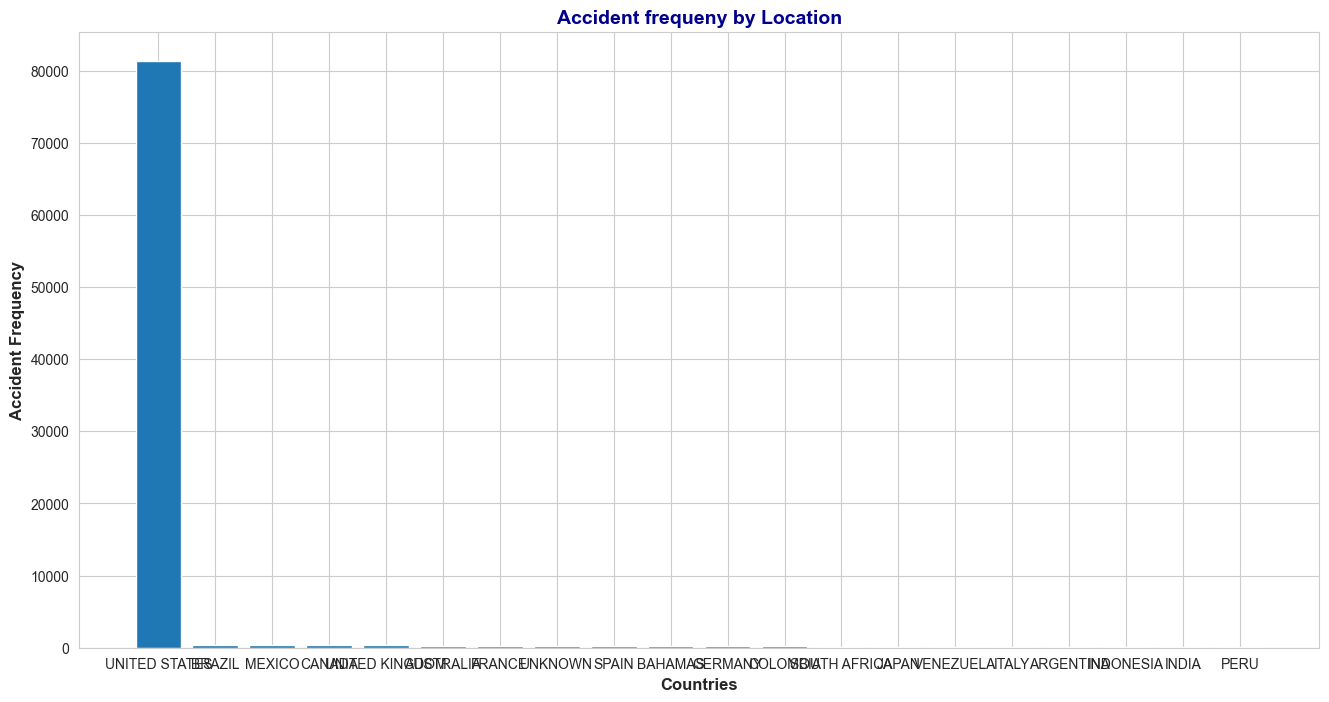

In [118]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(top_20_risk['Country'], top_20_risk['Total.Accidents'])

ax.set_title("Accident frequeny by Location", fontsize=14, fontweight='bold', color='darkblue')
ax.set_xlabel("Countries", fontsize=12, fontweight='bold')
ax.set_ylabel("Accident Frequency", fontsize=12, fontweight='bold')

### **Operational Risk Analysis**
- Aggregated **accidents by flight phase** (e.g., Takeoff, Landing, Cruise).
- Helps pinpoint **which stages of flight are most dangerous**.

In [78]:
operational_risk_df = aviation_data.groupby('Broad.phase.of.flight')['Event.Id'].count().reset_index()
operational_risk_df

,Broad.phase.of.flight,Event.Id
0,APPROACH,6389
1,CLIMB,1995
2,CRUISE,10141
3,DESCENT,1870
4,GO-AROUND,1345
5,LANDING,15320
6,MANEUVERING,8052
7,OTHER,116
8,STANDING,872
9,TAKEOFF,12404


A plot showing during which phases of flight an accident is likely to ocur 

Text(0, 0.5, 'Accident Frequency')

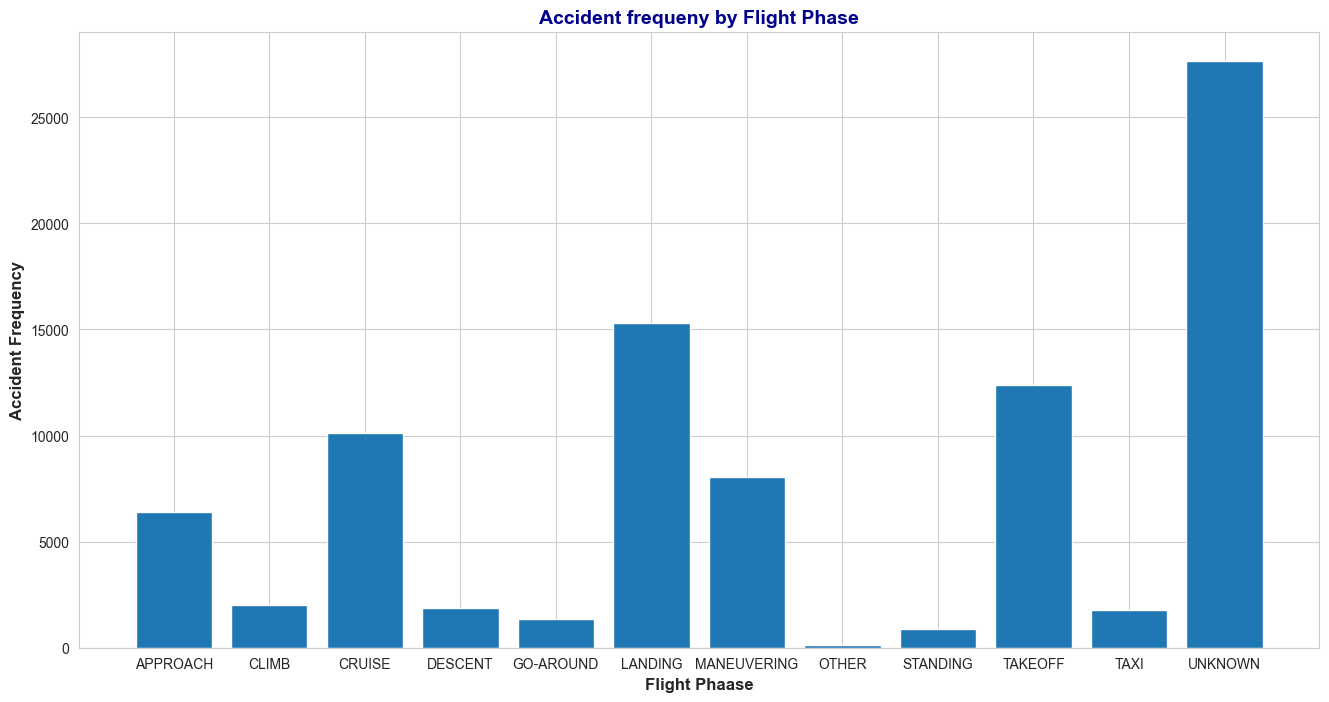

In [80]:
# A plot showing whih phase of flight anncident is mot likeley to occur 
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(operational_risk_df['Broad.phase.of.flight'], operational_risk_df['Event.Id'])

ax.set_title("Accident frequeny by Flight Phase", fontsize=14, fontweight='bold', color='darkblue')
ax.set_xlabel("Flight Phaase", fontsize=12, fontweight='bold')
ax.set_ylabel("Accident Frequency", fontsize=12, fontweight='bold')

### **Weather and Environmental Impact**
- Analyzed **weather conditions linked to accidents**.
- Helps evaluate how **weather impacts aviation safety** and influences **flight scheduling**.

In [440]:
aviation_data['Weather.Condition'].value_counts()

Weather.Condition
VMC    76417
IMC     5949
NAN     4474
UNK     1112
Name: count, dtype: int64

In [122]:
weather_impact_df = aviation_data.groupby('Weather.Condition')['Event.Id'].count().reset_index()
weather_impact_df.columns = ['Weather Condition', 'Total Accidents']
weather_impact_df

,Weather Condition,Total Accidents
0,IMC,5949
1,UNK,1112
2,UNKNOWN,4473
3,VMC,76417


# Key Business Insights From Analysis 